In [1]:
import os
from PIL import Image

dataset_path = "C:/Users/rugwe/Downloads/archive (3)/garbage_classification"
categories = ['paper', 'white-glass', 'plastic', 'shoes', 'metal', 'clothes']

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Check if the image file is not corrupted
        except (IOError, SyntaxError) as e:
            print(f"Corrupted file: {file_path}")

In [2]:
import cv2

target_size = (256, 256)

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(file_path)
            img_resized = cv2.resize(img, target_size)
            cv2.imwrite(file_path, img_resized)  # Overwrite or save to a new directory
        except Exception as e:
            print(f"Error resizing {file_path}: {e}")

In [7]:
import os

# Path to the root dataset folder
dataset_path = "C:/Users/rugwe/Downloads/archive (3)/garbage_classification"

# Names of subfolders (categories)
categories = ['paper', 'white-glass', 'plastic', 'shoes', 'metal', 'clothes']

# Lists to hold image paths and labels
all_images = []
labels = []

# Traverse each category folder
for category in categories:
    folder_path = os.path.join(dataset_path, category)  # Path to each category folder
    for filename in os.listdir(folder_path):  # List all files in the folder
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Check if it's an image
            all_images.append(os.path.join(folder_path, filename))  # Save full image path
            labels.append(category)  # Save the category as the label

# Check the result
print(f"Collected {len(all_images)} images.")
print(f"Example image paths: {all_images[:5]}")
print(f"Example labels: {labels[:5]}")

Collected 10761 images.
Example image paths: ['C:/Users/rugwe/Downloads/archive (3)/garbage_classification\\paper\\paper1.jpg', 'C:/Users/rugwe/Downloads/archive (3)/garbage_classification\\paper\\paper10.jpg', 'C:/Users/rugwe/Downloads/archive (3)/garbage_classification\\paper\\paper100.jpg', 'C:/Users/rugwe/Downloads/archive (3)/garbage_classification\\paper\\paper1000.jpg', 'C:/Users/rugwe/Downloads/archive (3)/garbage_classification\\paper\\paper1001.jpg']
Example labels: ['paper', 'paper', 'paper', 'paper', 'paper']


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
dataset_path = "C:/Users/rugwe/Downloads/archive (3)/garbage_classification"  # Root dataset directory
output_dir = "WSP"  # Directory to store train/val/test splits
categories = ['paper', 'white-glass', 'plastic', 'shoes', 'metal', 'clothes']

# Create output directories for train, val, test
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Ensure directories exist
for split_dir in [train_dir, val_dir, test_dir]:
    for category in categories:
        os.makedirs(os.path.join(split_dir, category), exist_ok=True)

# Collect all image paths and labels
all_images = []
labels = []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Ensure it's an image
            all_images.append(os.path.join(folder_path, filename))
            labels.append(category)

# Split the dataset into train, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    all_images, labels, test_size=0.3, stratify=labels, random_state=42
)
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Copy files into respective directories
def copy_files(image_paths, labels, target_dir):
    for img_path, label in zip(image_paths, labels):
        target_path = os.path.join(target_dir, label)
        shutil.copy(img_path, target_path)

copy_files(train_images, train_labels, train_dir)
copy_files(val_images, val_labels, val_dir)
copy_files(test_images, test_labels, test_dir)

print("Dataset split and copied successfully!")

# Image size and batch size
img_size = (256, 256)
batch_size = 32

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# For Validation and Test, only rescale
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Dataset split and copied successfully!
Found 7532 images belonging to 6 classes.
Found 1614 images belonging to 6 classes.
Found 1615 images belonging to 6 classes.


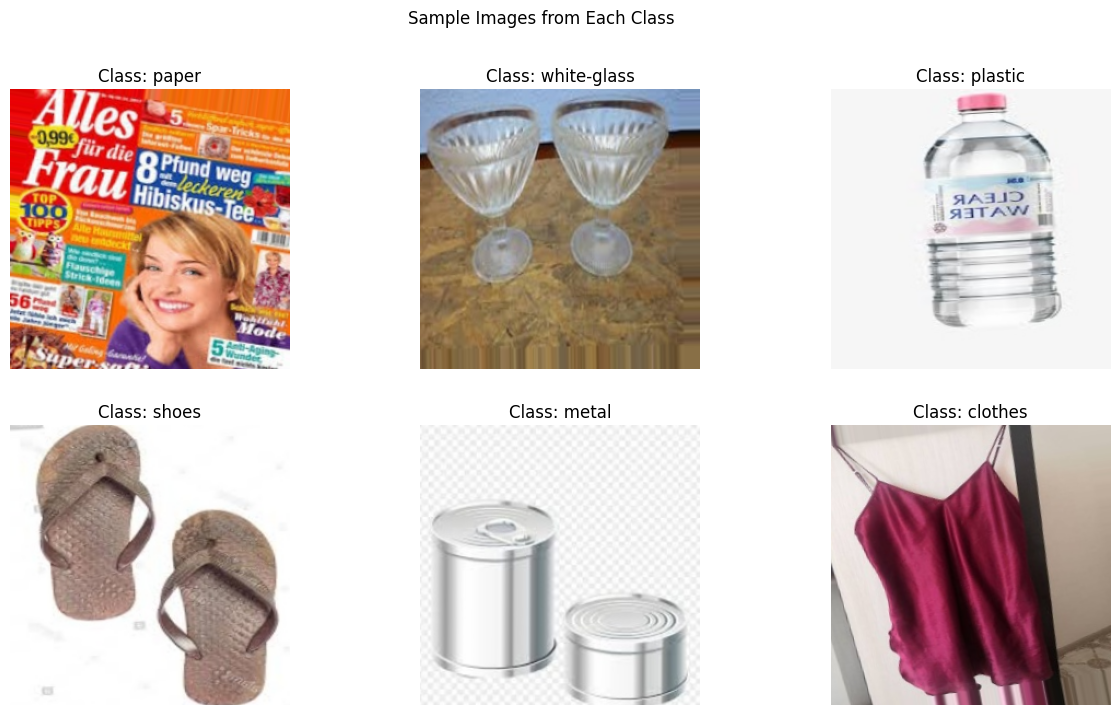

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Categories in your dataset
categories = ['paper', 'white-glass', 'plastic', 'shoes', 'metal', 'clothes']

# Get class indices from the train_generator
class_indices = train_generator.class_indices

# Reverse the dictionary to map index back to class name
class_labels = {v: k for k, v in class_indices.items()}

# Initialize a dictionary to store sample images from each class
class_images = {category: None for category in categories}

# Collect one sample image per class
for image, label in train_generator:
    for i in range(len(label)):
        # Get the index of the class (from one-hot encoded label)
        class_index = np.argmax(label[i])  # Use np.argmax to get the index of the class
        class_name = class_labels[class_index]  # Get the class name from the index
        
        # Store the first image of each class
        if class_images[class_name] is None:
            class_images[class_name] = image[i]
        
        # Stop if we have collected one image per class
        if all(class_images[category] is not None for category in categories):
            break
    
    # Exit the loop if all classes have one sample
    if all(class_images[category] is not None for category in categories):
        break

# Display images from each class
plt.figure(figsize=(15, 8))
for i, category in enumerate(categories):
    if class_images[category] is not None:
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns for displaying
        plt.imshow(class_images[category])  # Display the first image for each class
        plt.title(f"Class: {category}")
        plt.axis('off')

plt.suptitle("Sample Images from Each Class")
plt.show()


In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the pretrained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model to prevent training its layers initially
base_model.trainable = False

# Add custom layers for your classification task
model = models.Sequential([
    base_model,  # Add ResNet50 base model
    layers.GlobalAveragePooling2D(),  # Global pooling
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dense(len(categories), activation='softmax')  # Output layer
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 82s 1us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,878 (93.99 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Train for 10 epochs first
    validation_data=val_generator,
    validation_steps=val_generator.samples,
    callbacks=[early_stopping]
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - accuracy: 0.6221 - loss: 1.0728 - val_accuracy: 0.6245 - val_loss: 1.0224
Epoch 2/10


C:\Users\rugwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


235/235 ━━━━━━━━━━━━━━━━━━━━ 50s 207ms/step - accuracy: 0.6562 - loss: 1.0560 - val_accuracy: 0.6221 - val_loss: 1.0240
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.6252 - loss: 1.0516 - val_accuracy: 0.6332 - val_loss: 1.0014
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 50s 209ms/step - accuracy: 0.6562 - loss: 1.0500 - val_accuracy: 0.6289 - val_loss: 1.0040
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.6310 - loss: 1.0437 - val_accuracy: 0.6239 - val_loss: 0.9981
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 201ms/step - accuracy: 0.6875 - loss: 0.9248 - val_accuracy: 0.6245 - val_loss: 0.9983
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6479 - loss: 1.0007 - val_accuracy: 0.6660 - val_loss: 0.9627
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 254ms/step - accuracy: 0.7188 - loss: 0.9264 - val_accuracy: 0.6667 - val_loss: 0.9605
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.6403 - loss: 1.0054 - val_accurac

In [2]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("C:/Users/rugwe/Downloads/Garbage_Sorting_Model1.h5")

In [3]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Layer 0: resnet50, Trainable: True
Layer 1: global_average_pooling2d, Trainable: True
Layer 2: dense, Trainable: True
Layer 3: dense_1, Trainable: True


In [6]:
from tensorflow.keras.optimizers import Adam

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
dataset_path = "C:/Users/rugwe/Downloads/archive (3)/garbage_classification"  # Root dataset directory
output_dir = "WSP"  # Directory to store train/val/test splits
categories = ['paper', 'white-glass', 'plastic', 'shoes', 'metal', 'clothes']

# Create output directories for train, val, test
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

In [16]:
# Image size and batch size
img_size = (256, 256)
batch_size = 32

In [17]:
# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# For Validation and Test, only rescale
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7532 images belonging to 6 classes.
Found 1614 images belonging to 6 classes.
Found 1615 images belonging to 6 classes.


In [21]:
base_model = model.get_layer('resnet50')
# Fine-tuning: Unfreeze the top layers of the ResNet50 model
base_model.trainable = True

# Unfreeze the last 10 layers instead of 4
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Fine-tune for 5 more epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 838s 4s/step - accuracy: 0.6616 - loss: 0.9569 - val_accuracy: 0.6875 - val_loss: 0.8936
Epoch 2/5
  1/235 ━━━━━━━━━━━━━━━━━━━━ 12:28 3s/step - accuracy: 0.6875 - loss: 0.8497

C:\Users\rugwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 598ms/step - accuracy: 0.6875 - loss: 0.8497 - val_accuracy: 0.6894 - val_loss: 0.8940
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.6638 - loss: 0.9408 - val_accuracy: 0.6769 - val_loss: 0.8848
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.7188 - loss: 0.7615 - val_accuracy: 0.6800 - val_loss: 0.8804
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.6654 - loss: 0.9409 - val_accuracy: 0.6869 - val_loss: 0.8910


In [22]:
model.save('Garbage_Sorting_Model2.h5')

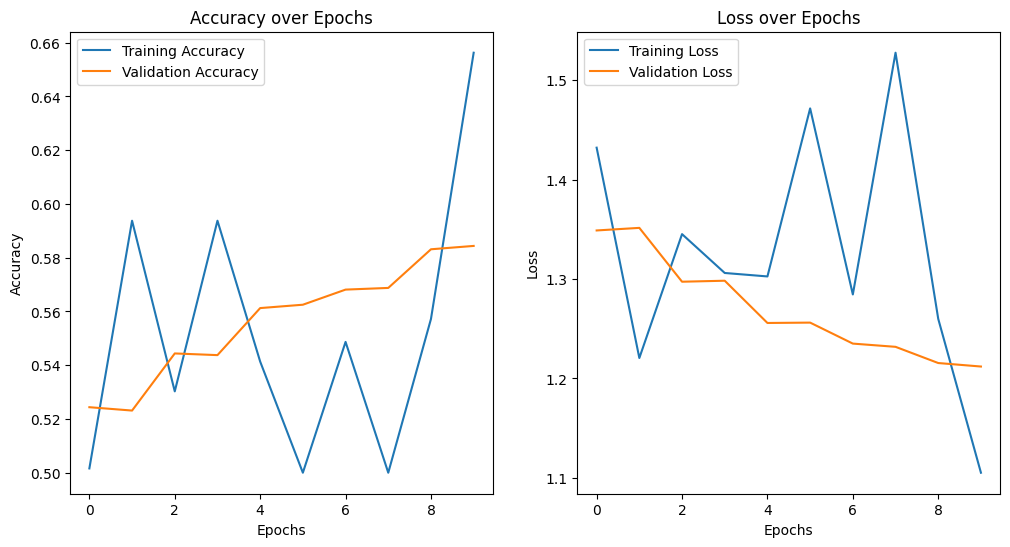

In [15]:
# Assuming you have history of training (from model.fit())
# If not, store the result of model.fit() as `history` while training

# Plotting Training & Validation Accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 909ms/step - accuracy: 0.6930 - loss: 0.8602
Test Loss: 0.8835451602935791
Test Accuracy: 0.674303412437439
51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step


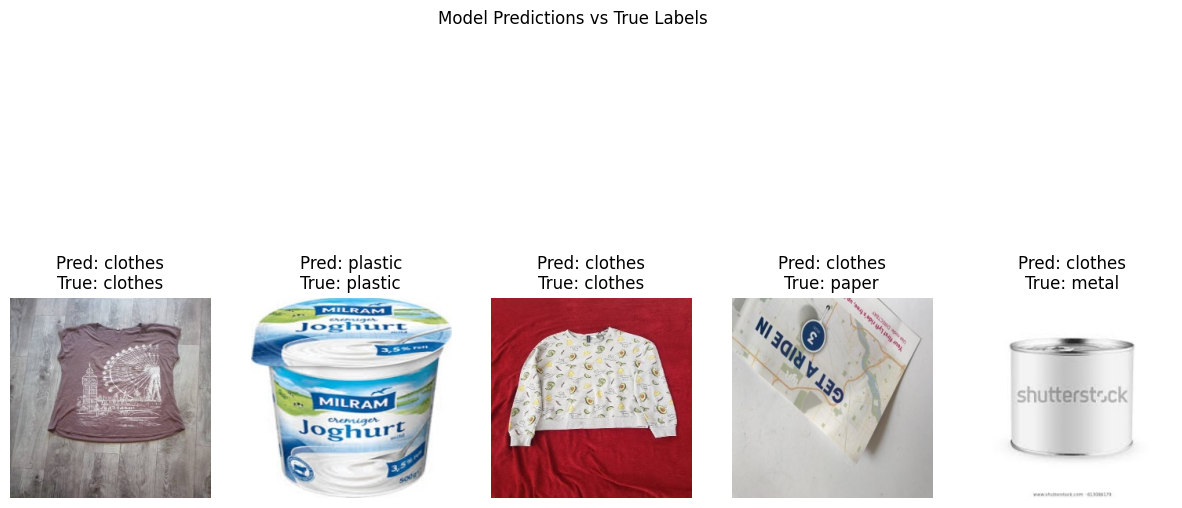

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions
predictions = model.predict(test_generator, verbose=1)

# Get the true labels (ground truth) from the test_generator
true_labels = test_generator.classes
# Get the class indices from the generator
class_indices = test_generator.class_indices
# Reverse the dictionary to map class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

# Convert predictions to class indices (highest probability)
predicted_classes = np.argmax(predictions, axis=1)

# Display a few examples with predicted labels
plt.figure(figsize=(15, 8))

for i in range(5):  # Show 5 random images
    # Get a random image and its predicted label
    image, label = test_generator[i]
    pred_class = predicted_classes[i]
    true_class = label.argmax(axis=-1)[0]  # True class (as an index)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title(f"Pred: {class_labels[pred_class]}\nTrue: {class_labels[true_class]}")
    plt.axis('off')

plt.suptitle("Model Predictions vs True Labels")
plt.show()

51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 908ms/step


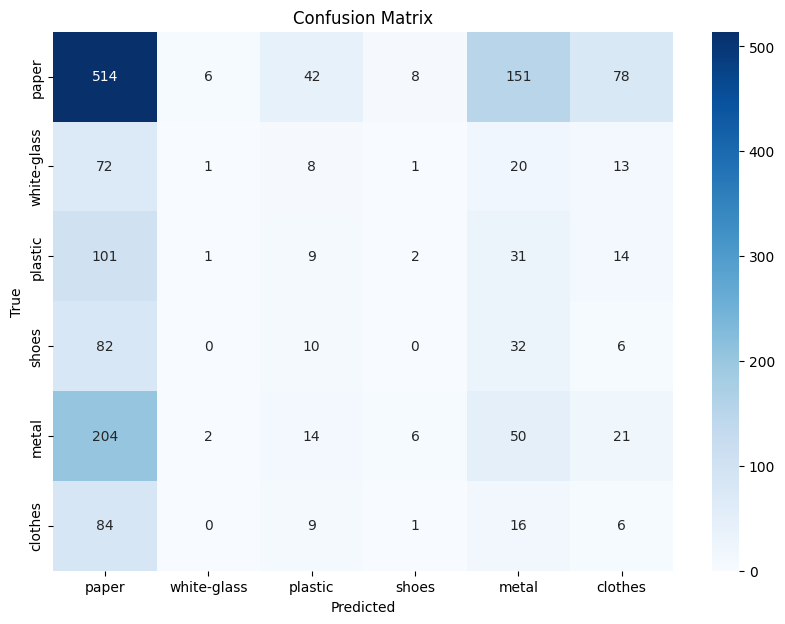

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels (ground truth) and predicted labels
true_labels = test_generator.classes
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

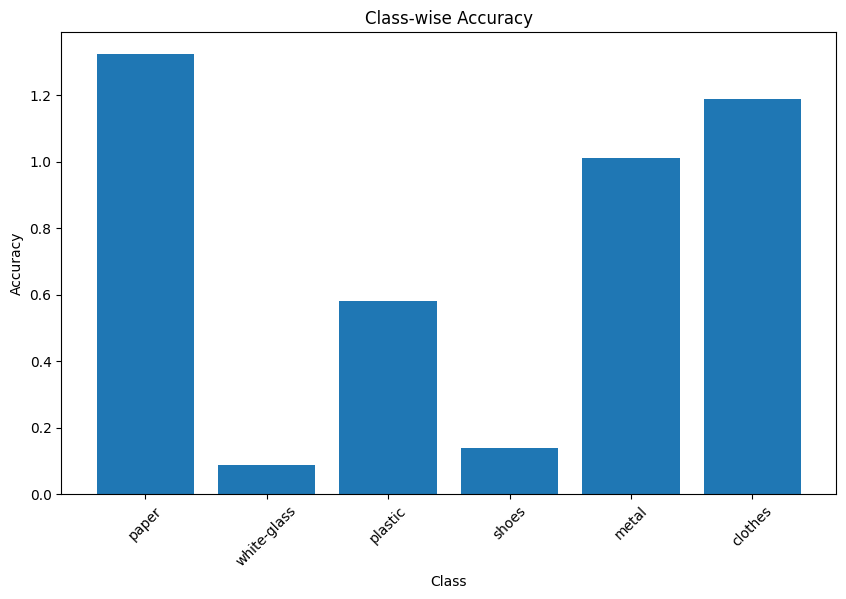

In [28]:
import numpy as np

# Calculate class-wise accuracy
class_accuracies = {}
for i, category in enumerate(categories):
    class_accuracy = np.sum(predicted_classes == i) / np.sum(true_labels == i)
    class_accuracies[category] = class_accuracy

# Plot class-wise accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.title('Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
